In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
rcParams['figure.figsize'] = 30, 10
print('setup complete')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


setup complete


In [2]:
conf_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
reco_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
import datetime

In [4]:
#getting all the dates
cols = conf_df.keys() #it has all the columns

conf = conf_df.loc[:, cols[4]:cols[-1]]
death = death_df.loc[:, cols[4]:cols[-1]]
reco = reco_df.loc[:, cols[4]:cols[-1]]

In [5]:
#now we have all the dates
dates = conf.keys()

In [6]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

In [7]:
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

countrywise_cases_conf = []
countrywise_cases_reco = []
countrywise_cases_death = []
countrywise_cases_active = []

#j=0
for i in dates:
    
    confirmed_sum = conf[i].sum()
    death_sum = death[i].sum()
    recovered_sum = reco[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    
    # case studies 
    #china_cases.append(conf_df[conf_df['Country/Region']=='China'][i].sum())
    #italy_cases.append(conf_df[conf_df['Country/Region']=='Italy'][i].sum())
#     india_cases_conf.append(conf_df[conf_df['Country/Region']=='India'][i].sum())
#     india_cases_reco.append(reco_df[reco_df['Country/Region']=='India'][i].sum())
#     india_cases_death.append(death_df[death_df['Country/Region']=='India'][i].sum())
#     india_cases_active.append(india_cases_conf[j] - india_cases_reco[j] - india_cases_death[j])
    
#    j = j+1

In [8]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [9]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [10]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [11]:
#total confirmed cases in the world
world_df = pd.DataFrame(index=dates,data=world_cases, columns=['conf_cases'])
world_df['daily_new_cases'] = world_df.diff()
world_df['daily_new_cases'][0] = world_df['conf_cases'][0]
world_df['daily_new_cases'] =world_df['daily_new_cases'].astype('int64')

In [12]:
total_death_df = pd.DataFrame(index=dates,data=total_deaths, columns=['total_death'])
total_death_df['new_death'] = total_death_df.diff()
total_death_df['new_death'][0] = total_death_df['total_death'][0] 
total_death_df['new_death'] = total_death_df['new_death'].astype('int64')

In [13]:
total_reco_df = pd.DataFrame(index=dates,data=total_recovered, columns=['total_recovered'])
total_reco_df['new_reco'] = total_reco_df.diff()
total_reco_df['new_reco'][0] = total_reco_df['total_recovered'][0] 
total_reco_df['new_reco'] = total_reco_df['new_reco'].astype('int64')

In [14]:

##this is tricky but true as it is daily new active cases being found both way it give same ans
total_active_df = pd.DataFrame(index=dates,data=total_active, columns=['total_active'])

#total_active_df['new_active111'] = world_df['daily_new_cases'] - total_death_df['new_death'] - total_reco_df['new_reco']
total_active_df['new_active'] = total_active_df['total_active'].diff()
total_active_df['new_active'][0] = total_active_df['total_active'][0] 
total_active_df['new_active'] = total_active_df['new_active'].astype('int64')

total_active_df=total_active_df.clip(lower =0)

In [15]:
world_full = pd.concat([world_df,total_reco_df,total_death_df,total_active_df], axis=1)

In [16]:
#this dataset is for regression for univariate 

In [17]:
world_full.head(5) #datasetprepared

,conf_cases,daily_new_cases,total_recovered,new_reco,total_death,new_death,total_active,new_active
1/22/20,555.0,555,28.0,28,17.0,17,510.0,510
1/23/20,653.0,98,30.0,2,18.0,1,605.0,95
1/24/20,941.0,288,36.0,6,26.0,8,879.0,274
1/25/20,1434.0,493,39.0,3,42.0,16,1353.0,474
1/26/20,2118.0,684,52.0,13,56.0,14,2010.0,657


In [18]:
world_full.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

# Prediction 
for next 10 days

### Solving It as Univariate Problem

In [19]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False) 

In [20]:
# use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [3, 4, 5]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 16278.788744432222
MSE: 404306430.1462365


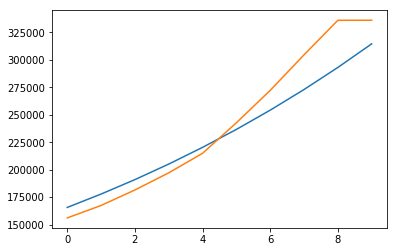

In [21]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [22]:
len(svm_pred)

72

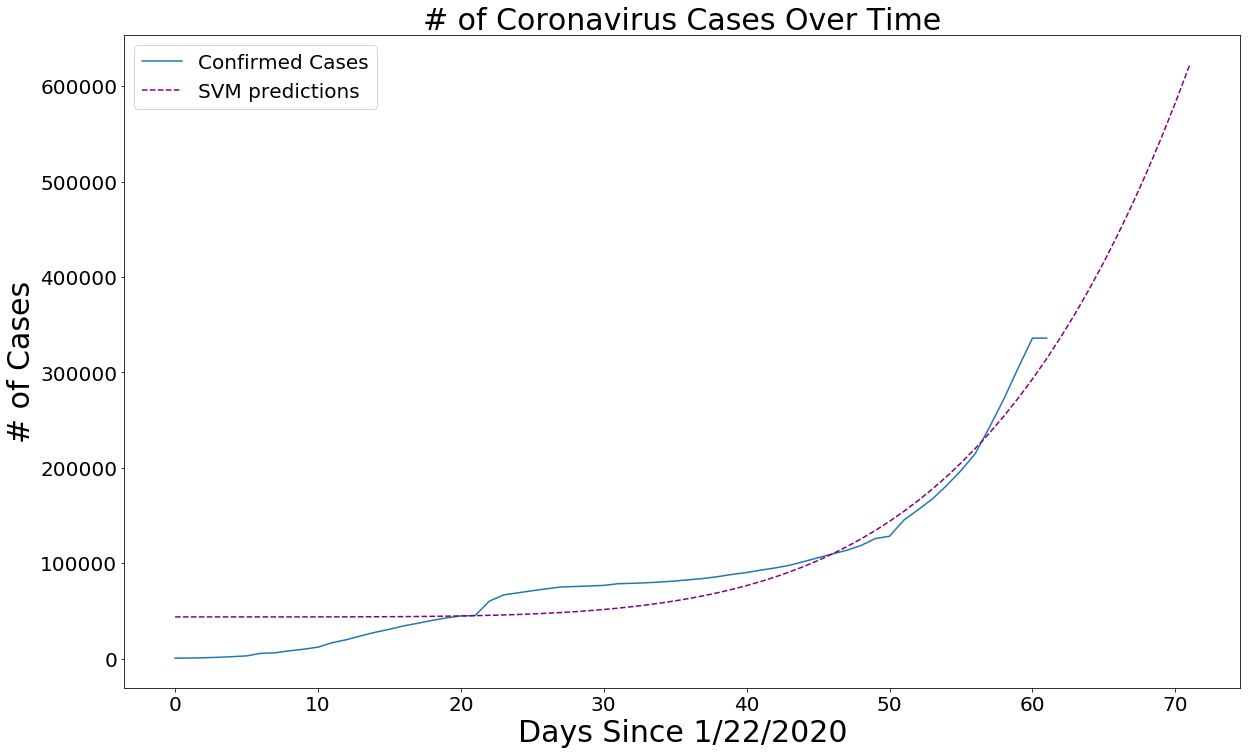

In [23]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [24]:
# Future predictions using SVM 
print('SVM future predictions:')
list(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


[('03/24/2020', 337439.0),
 ('03/25/2020', 361897.0),
 ('03/26/2020', 387960.0),
 ('03/27/2020', 415703.0),
 ('03/28/2020', 445206.0),
 ('03/29/2020', 476553.0),
 ('03/30/2020', 509829.0),
 ('03/31/2020', 545120.0),
 ('04/01/2020', 582518.0),
 ('04/02/2020', 622115.0)]

MAE: 6710.417384342907
MSE: 86985470.62226407


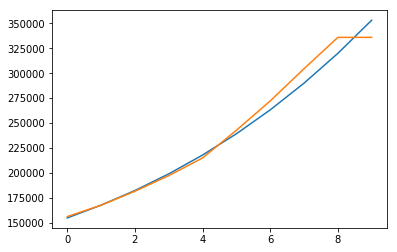

In [25]:
# Also creating Polynomial Features
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)

In [26]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
list(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))


Polynomial regression future predictions:


[('03/24/2020', 390009.0),
 ('03/25/2020', 430680.0),
 ('03/26/2020', 475468.0),
 ('03/27/2020', 524656.0),
 ('03/28/2020', 578541.0),
 ('03/29/2020', 637429.0),
 ('03/30/2020', 701641.0),
 ('03/31/2020', 771507.0),
 ('04/01/2020', 847370.0),
 ('04/02/2020', 929585.0)]

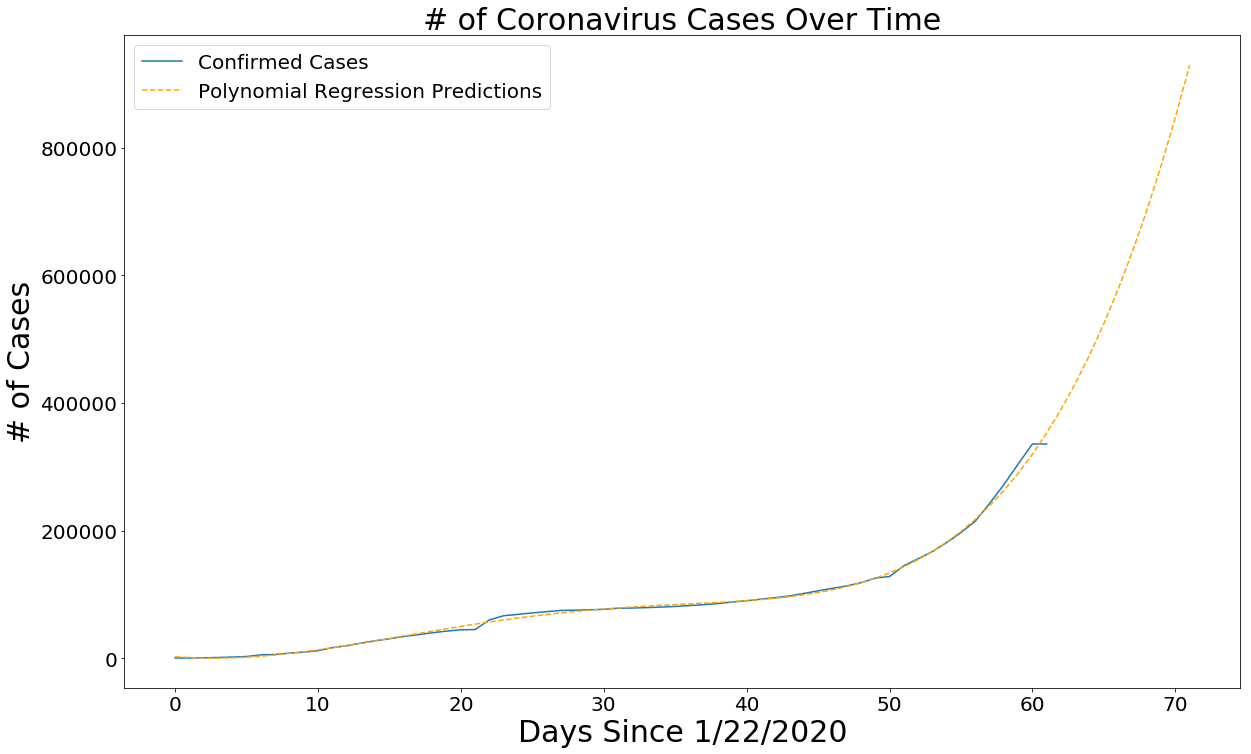

In [27]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### ARIMA Model
##### Using Pyramid ARIMA 
It has auto arima 

In [28]:
import pyramid as pm
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

In [29]:
tsarima = auto_arima(world_cases,start_p=1, d=None, start_q=0, max_p=5, max_d=2, max_q=5, 
 start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, 
 max_order=10, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, 
 test='kpss', seasonal_test='ch', stepwise=True,n_jobs=-1, start_params=None, trend='c',
 method=None, transparams=True, solver='lbfgs',maxiter=50, disp=0, callback=None, 
 offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, 
 error_action='warn', trace=False, random=False,random_state=None,n_fits=10, 
return_valid_fits=False, out_of_sample_size=0, scoring='mse')

/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:379: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


In [30]:
tsarima.fit(world_cases)
arima_pred = tsarima.predict(n_periods=10)
arima_pred = pd.DataFrame(arima_pred,index = future_forcast_dates[-10:],columns=['Prediction'])

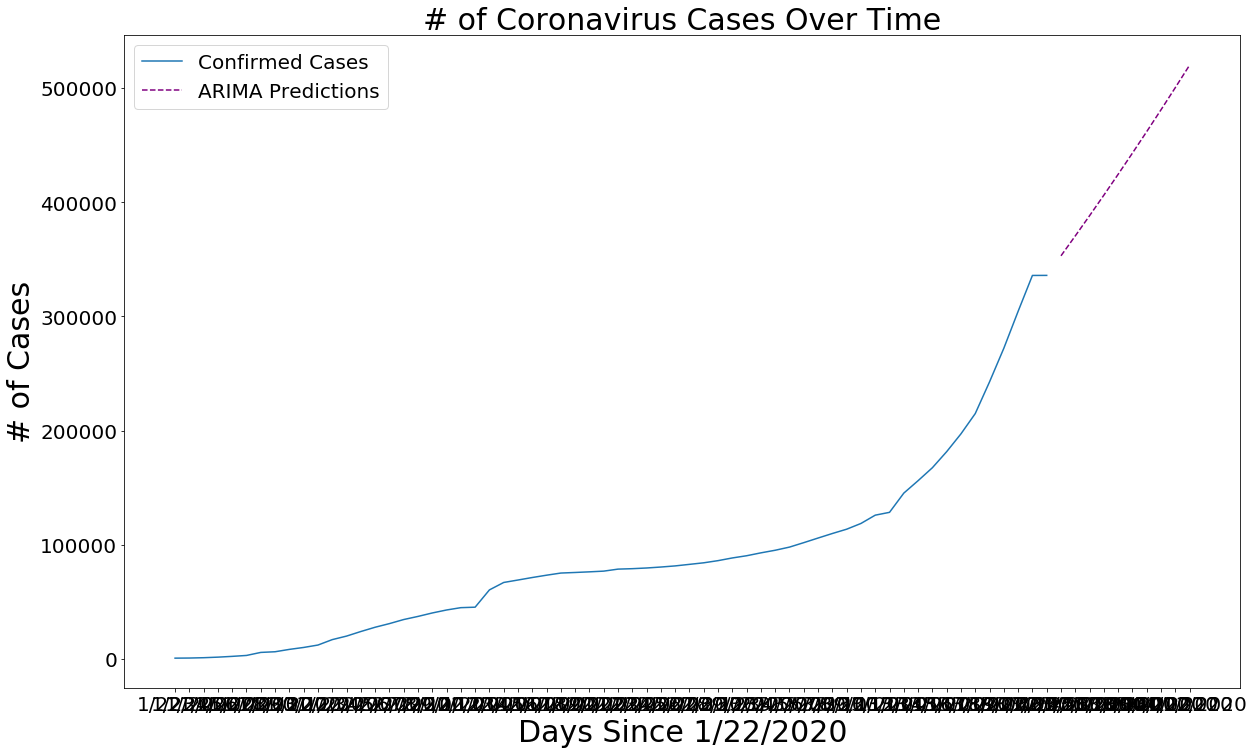

In [31]:
plt.figure(figsize=(20, 12))
plt.plot(world_df["conf_cases"])
plt.plot(arima_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'ARIMA Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [32]:
# Future predictions using ARIMA
print('ARIMA future predictions:')
arima_pred

ARIMA future predictions:


,Prediction
03/24/2020,353160.312549
03/25/2020,370599.031017
03/26/2020,388320.155405
03/27/2020,406323.685713
03/28/2020,424609.621941
03/29/2020,443177.964089
03/30/2020,462028.712156
03/31/2020,481161.866143
04/01/2020,500577.426050
04/02/2020,520275.391877


## Solving as a multivariate problem

In [96]:
dates = conf_df.columns[4:]

#making new dataframes for confiremed ,death and recovred cases
conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = death_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = reco_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

#full table combinig all confirmed,recovered and deaths 
full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], 
                       axis=1, sort=False)

full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0


In [100]:
# full_table = pd.read_csv('covid_19_full_updatedNew.csv')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,2
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,2
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,0
...,...,...,...,...,...,...,...,...,...
18051,NaN,Dominica,15.4150,-61.3710,3/22/20,1,0,0,1
18052,NaN,Grenada,12.1165,-61.6790,3/22/20,1,0,0,1
18053,NaN,Mozambique,-18.6657,35.5296,3/22/20,1,0,0,1
18054,NaN,Syria,34.8021,38.9968,3/22/20,1,0,0,1


In [1]:
#Will be adding Soon

## Growth Factor

In [ ]:
# This functions smooths data, thanks to Dan Pearson. We will use it to smooth the data for growth factor.
def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed

def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)

def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

# This is a function which plots (for in input country) the active, confirmed, and recovered cases, deaths, and the growth factor.
def plot_country_active_confirmed_recovered(country):
    
    # Plots Active, Confirmed, and Recovered Cases. Also plots deaths.
    country_data = global_data[global_data['Country/Region']==country]
    table = country_data.drop(['SNo','Province/State', 'Last Update'], axis=1)
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']
    table2 = pd.pivot_table(table, values=['ActiveCases','Confirmed', 'Recovered','Deaths'], index=['ObservationDate'], aggfunc=np.sum)
    table3 = table2.drop(['Deaths'], axis=1)
   
    # Growth Factor
    w = 0.5
    table2['GrowthFactor'] = growth_factor(table2['Confirmed'])
    table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

    # 2nd Derivative
    table2['2nd_Derivative'] = np.gradient(np.gradient(table2['Confirmed'])) #2nd derivative
    table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


    #Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
    table2['GrowthRatio'] = growth_ratio(table2['Confirmed'])
    table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
    #Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
    table2['GrowthRate']=np.gradient(np.log(table2['Confirmed']))
    table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)
    
    # horizontal line at growth rate 1.0 for reference
    x_coordinates = [1, 100]
    y_coordinates = [1, 1]
    #plots
    table2['Deaths'].plot(title='Deaths')
    plt.show()
    table3.plot() 
    plt.show()
    table2['GrowthFactor'].plot(title='Growth Factor')
    plt.plot(x_coordinates, y_coordinates) 
    plt.show()
    table2['2nd_Derivative'].plot(title='2nd_Derivative')
    plt.show()
    table2['GrowthRatio'].plot(title='Growth Ratio')
    plt.plot(x_coordinates, y_coordinates)
    plt.show()
    table2['GrowthRate'].plot(title='Growth Rate')
    plt.show()


    return 


## CurveFitting Technique
### The Math: Exponential vs Logistic
The spread of infectious disease can be modeled using a logistic curve rather than an exponential curve. The growth starts exponentially, but must slow down after some point called the inflection point. The inflection point is essentially the midpoint of the spread. We will model the number of confirmed cases using a logistic curve. Let's look at the equation for such a curve, the differential equation for which this curve is a solution, and the graph of the curve.

In [107]:
from scipy.optimize import curve_fit


In [108]:
world_full.head()

,conf_cases,daily_new_cases,total_recovered,new_reco,total_death,new_death,total_active,new_active
1/22/20,555.0,555,28.0,28,17.0,17,510.0,510
1/23/20,653.0,98,30.0,2,18.0,1,605.0,95
1/24/20,941.0,288,36.0,6,26.0,8,879.0,274
1/25/20,1434.0,493,39.0,3,42.0,16,1353.0,474
1/26/20,2118.0,684,52.0,13,56.0,14,2010.0,657


In [109]:
data = world_full.copy()

In [110]:
#country_data['GrowthFactor'] = growth_factor(country_data['Confirmed'])

# we will want x_data to be the number of days since first confirmed and the y_data to be the confirmed data. This will be the data we use to fit a logistic curve
x_data = range(len(data.index))
y_data = data['conf_cases']

def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=5000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(x_data, k, x_0, ymax)
print(k, x_0, ymax)
#print(y_fitted)
y_data.tail()

0.05543641806494608 280.74181215153914 58948871190.67571


3/19/20    242708.0
3/20/20    272166.0
3/21/20    304524.0
3/22/20    335955.0
3/23/20    336004.0
Name: conf_cases, dtype: float64

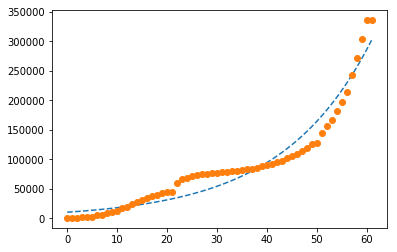

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y_fitted, '--', label='fitted')
ax.plot(x_data, y_data, 'o', label='Confirmed Data')

#### The Graph suggests that it has not still reach its Inflection point !! Hence more dreadful days are yet to come! 
## But Ray of Hope!! 
#### There are various parameters which cant be incoporated like lockdown, preventive measures, medical facilities etc. This all will effect the growth rate!